# Curso de Métodos Numéricos (DEMAT)
# Tarea 8

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Octubre 14, 2023**    |
| Fecha límite de entrega de la tarea: | **Octubre 23, 2023**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que **incluya
  el notebook** y los archivos adicionales.
- Si todos los códigos que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

---

## Ejercicio 1 (4 puntos)

1. Escriba una función que devuelva los intervalos
   que contienen a los eigenvalores de una matriz de acuerdo al Teorema
   de los círculos de Gershgorin.

- La función recibe como entrada una matriz cuadrada $\mathbf{A}=[a_{ij}]$.
- Si $n$ es el tamaño de la matriz, cree un arreglo  $G$ de tamaño $n \times 2$.
  En cada fila del arreglo $G$ guarde los extremos de los intervalos,
  que acuerdo con el teorema, para cada $i=1,2,...,n$
  los intervalos están dados por

$$ [a_{ii} - s_i, \; a_{ii} + s_i] $$

  donde
   
$$  s_i = \min\{r_i, c_i\} \quad \text{y} \quad
    r_i = \sum_{j=1\atop j\ne i}^n |a_{ij}|, \quad
    c_i = \sum_{j=1\atop j\ne i}^n |a_{ji}|.
$$

- De este modo, en la primera columna de $G$ se almacenan los
  valores $a_{ii} - s_i$ y en la segunda columna los valores
  $a_{ii} + s_i$.

- La función devuelve el arreglo $G$.

2. En las siguientes celdas se dan dos matrices que se vieron
   en los ejemplos B y C de la Clase 17.
   Aplique la función anterior a esas matrices, imprima las
   matrices $G$. Puede revisar estos resultados están correctos
   viendo las gráficas de la diapositiva 15 de la Clase 17.

### Solución.

In [99]:
# Codigo de la función
import numpy as np

def gershgorinRadius(A: np.ndarray):
    return (min(np.sum(np.abs(A[i, :])), np.sum(np.abs(A[:, i]))) - np.abs(A[i, i]) for i in range(A.shape[0]))

def gershgorinIntervals(A: np.ndarray):

    # intervals = ([A[i, i]-r, A[i, i]+r] for i, r in enumerate(gershgorinRadius(A)))

    # return np.array([[A[i, i] -(s := (min(np.sum(np.abs(A[i, :])), np.sum(np.abs(A[:, i]))) - np.abs(A[i, i])) ), A[i, i] + s] for i in range(A.shape[0])] )
    # return np.fromiter(intervals, dtype=np.dtype((float, 2)))
    return np.array([[A[i, i]-r, A[i, i]+r] for i, r in enumerate(gershgorinRadius(A))])



In [100]:
# Unas pruebas para medir la eficiencia de ciertas implementaciones

from IPython.utils.path import random

%timeit gershgorinIntervals(np.random.random((3, 3)))
%timeit (lambda A: np.array([[A[i, i] -(s := (min(np.sum(np.abs(A[i, :])), np.sum(np.abs(A[:, i]))) - np.abs(A[i, i])) ), A[i, i] + s] for i in range(A.shape[0])] ))(np.random.random((3, 3)))
# np.random.random((3, 3))

47.6 µs ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.5 µs ± 9.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [101]:
# Datos de prueba
import numpy as np

B = np.array([[ 5.0,  -0.10,  0.90,   1.00,    0.40],
              [-0.5,   1.45, -0.05,   0.00,    0.25],
              [ 0.2,   0.05,  1.13,   0.10,    0.35],
              [ 1.6,  -0.25,  0.50,   1.00,    0.30],
              [ 1.4,   0.40,  0.20,   0.25,   -0.80]])

C = np.array([[ 4.6023708,  -0.6484326,   2.6800333,   0.1378698,   0.3655997],
              [-0.3480484,  -4.9229298,   0.0876574,  -1.2066205,  -1.2046782],
              [ 1.0992412,   0.0206325,  -4.2138133,  -0.3166074,  -1.3973391],
              [ 0.5966447,   2.3193512,  -2.5578133,   4.6455689,  -0.1206493],
              [-0.0702810,  -1.8568523,   0.7597306,  -0.1774737,   4.4888034]])


In [102]:
# Pruebas

gershgorinIntervals(B), gershgorinIntervals(C)

(array([[ 2.6 ,  7.4 ],
        [ 0.65,  2.25],
        [ 0.43,  1.83],
        [-0.35,  2.35],
        [-2.1 ,  0.5 ]]),
 array([[ 2.4881555,  6.7165861],
        [-7.7699343, -2.0759253],
        [-7.0476335, -1.3799931],
        [ 2.8069975,  6.4841403],
        [ 1.6244658,  7.353141 ]]))

De hecho podemos graficar los circulos

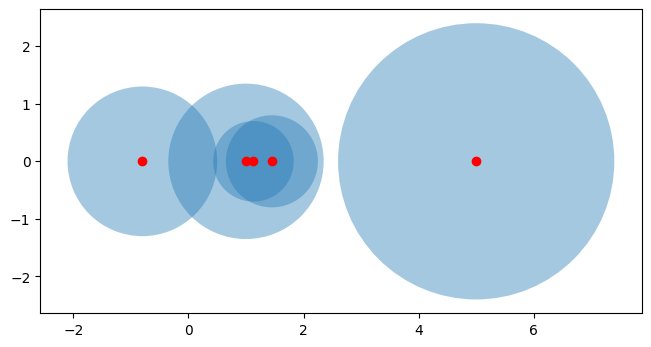

In [103]:
# Circulos para el caso de B
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(layout="constrained")
centers = B.diagonal()

circles = [Circle((x, 0), r) for x, r in zip(centers, gershgorinRadius(B))]
p = PatchCollection(circles, alpha=0.4)
ax.add_collection(p)
ax.scatter(centers, np.zeros(centers.size), color="red")
ax.set_aspect(1)
ax.autoscale()

# fig.tight_layout()
# fig.show()


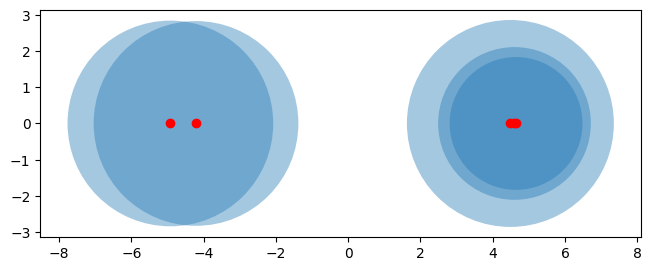

In [104]:

fig, ax = plt.subplots(layout="constrained")
centers = C.diagonal()

circles = [Circle((x, 0), r) for x, r in zip(centers, gershgorinRadius(C))]
p = PatchCollection(circles, alpha=0.4)
ax.add_collection(p)
ax.scatter(centers, np.zeros(centers.size), color="red")
ax.set_aspect(1)
ax.autoscale()

_ _

```







```

---

## Ejercicio 2 (6 puntos)

1. Programe el método de la potencia inversa con desplazamiento.

**Entradas de la función:**
- una matriz cuadrada $\mathbf{A}=[a_{ij}]$,
- un vector inicial  $\mathbf{x}^{(0)}$,
- el desplazamiento $\delta$,
- el número máximo de iteraciones $N$ y
- una tolerancia $\tau>0$.

**Salida de la función:**
- $\mu$,
- $\mathbf{x}^{(k)}$,
- el número de iteraciones realizadas $k$,
- el valor del error $\|\mathbf{r}\|$ y
- una variable $res$ que indica si
  $(\mu, \mathbf{x}^{(k)})$ se puede considerar que es un eigenpar
  de la matriz  $\mathbf{A}$ o no.
  
**Algoritmo:**

1. Iniciar $res=False$
2. Definir $n$ como el tamaño de la matriz
3. Para $k=0,1,...,N-1$, calcular lo siguiente

- Resolver el sistema  $(\mathbf{A} - \delta\mathbf{I})\mathbf{y} = \mathbf{x}^{(k)}$
- $\hat{x} = \mathbf{y}/\|\mathbf{y}\|$
- $\mathbf{w} = \mathbf{x}^{(k)}/\|\mathbf{y}\|$
- $\rho   = \hat{x}^\top \mathbf{w}$
- $\mu = \delta + \rho $
- $\mathbf{r} = \mathbf{w} - \rho \hat{x}$
- Si $\|\mathbf{r}\| < \tau$, hacer $res=True$ y terminar las iteraciones
- En caso contrario, hacer

$$\mathbf{x}^{(k+1)} = \hat{x} $$

4. Devolver $\mu, \mathbf{x}^{(k)}, k, \|\mathbf{r}\|, res$

**Nota:**
Como la matriz $\mathbf{A}$ es genérica, para resolver el sistema
de ecuaciones use un método general, como factorización LU.
Puede usar la implementación que hizo en una tarea o usar
alguna de las implementaciones de la librería de Python.

2. Escriba una función que reciba como entrada una matriz
   cuadrada $\mathbf{A}$ e imprima los resultados de aplicar
   el algoritmo anterior de acuerdo con las siguientes indicaciones:
   
- Use la función del Ejercicio 1 para obtener la matriz  $\mathbf{G}=[g_{ij}]$
- Para cada $i=1,...,n$, donde $n$ es el tamaño de la matriz $\mathbf{A}$,
  use el algoritmo del método de la potencia inversa
  usado como vector inicial $\mathbf{x}^{(0)}=(1,1,...,1)$.
  Pruebe dos los extremos del intervalo $g_{i1}$ y $g_{i2}$ para
  dar valor al desplazamiento $\delta$
- Cada vez que use el algoritmo del metodo de la potencia inversa
  imprima los valores $\delta, \mu, k, \|\mathbf{r}\|, res$ para
  ver si el algoritmo convergió y $\mu$ es un eigenvalor de $\mathbf{A}$.
- Use como cantidad máxima de iteraciones $N=200$ y una
  tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$
  es el épsilon de la máquina.
  
3. Pruebe el algoritmo con las matrices B y C del Ejercicio 1.

### Solución:

In [105]:
# Código de las funciones
import numpy as np
from numpy.linalg import norm

def potenciaInversa(A:np.ndarray, x0: np.ndarray, delta:float, N:int, t:float):
    res = False
    n = A.shape[0]
    I = np.identity(n)
    for k in range(N):
        y = np.linalg.solve(A-delta*I, x0)
        x = y/norm(y)
        w = x0/norm(y)
        p = np.dot(x, w)
        mu = delta + p
        r = w - p*x
        if norm(r) < t:
            res = True
            break
        x0 = x
    return mu, x0, k, norm(r), res

def eigenPars(A: np.ndarray):
    """Find eigen par using the ends of the Gershgorin Intervals"""
    G = gershgorinIntervals(A)
    n = A.shape[0]
    N = 200
    t = np.finfo(float).eps**(1/2)
    for g1, g2 in G:
        x0 = np.ones(n)
        mu,_,k, r, res = potenciaInversa(A, x0, g1, N, t)
        print(f"delta={g1} mu={mu} k={k}, norm(r) = {r} res={res}")
        # print(g1, mu, k, r, res)
        mu,_,k, r, res = potenciaInversa(A, x0, g2, N, t)
        print(f"delta={g2} mu={mu} k={k}, norm(r) = {r} res={res}")
        print()



In [106]:
# Pruebas

print("Prueba para la matriz B")
eigenPars(B)

print("Prueba para la matriz C")
eigenPars(C)




Prueba para la matriz B
delta=2.5999999999999996 mu=1.4849196055447549 k=50, norm(r) = 1.1772620872917967e-08 res=True
delta=7.4 mu=5.547927880895997 k=16, norm(r) = 1.0778921069854087e-08 res=True

delta=0.6499999999999999 mu=0.6370983598960425 k=5, norm(r) = 5.569488636103395e-10 res=True
delta=2.25 mu=1.4849196055522693 k=36, norm(r) = 1.3515355441631014e-08 res=True

delta=0.4299999999999997 mu=0.6370983638112927 k=15, norm(r) = 1.1550347035524296e-08 res=True
delta=1.83 mu=1.484919605530602 k=20, norm(r) = 8.362295109546087e-09 res=True

delta=-0.3500000000000001 mu=-0.9419583093378409 k=36, norm(r) = 9.407812143164632e-09 res=True
delta=2.35 mu=1.484919605549739 k=40, norm(r) = 1.2930745821140111e-08 res=True

delta=-2.1 mu=-0.9419583122319337 k=21, norm(r) = 9.571754164300273e-09 res=True
delta=0.5 mu=0.6370983621664509 k=12, norm(r) = 6.929387396881803e-09 res=True

Prueba para la matriz C
delta=2.4881555000000013 mu=4.400000014235818 k=164, norm(r) = 1.4817214669762984e-08 res

Notemos que tomamos los extremos del intervalo como $δ$, sin embargo veamos que pasa si not tomamos los puntos medios del centro de la circunferencia a los extremos

In [107]:
def eigenParsM(A: np.ndarray):

    radius = [r/2 for r in gershgorinRadius(A)]
    centers = A.diagonal()
    G = ((c-r, c+r) for c, r in zip(centers, radius))
    n = A.shape[0]
    N = 200
    t = np.finfo(float).eps**(1/2)
    for g1, g2 in G:
        x0 = np.ones(n)
        mu,_,k, r, res = potenciaInversa(A, x0, g1, N, t)
        print(f"delta={g1} mu={mu} k={k}, norm(r) = {r} res={res}")
        # print(g1, mu, k, r, res)
        mu,_,k, r, res = potenciaInversa(A, x0, g2, N, t)
        print(f"delta={g2} mu={mu} k={k}, norm(r) = {r} res={res}")
        print()

In [108]:
## Pruebas
eigenParsM(B)
eigenParsM(C)

delta=3.8 mu=5.54792788088942 k=69, norm(r) = 1.1523435995761692e-08 res=True
delta=6.2 mu=5.547927880831577 k=9, norm(r) = 1.0401406287347476e-08 res=True

delta=1.0499999999999998 mu=1.0520124657827337 k=3, norm(r) = 4.750219926290405e-10 res=True
delta=1.85 mu=1.4849196055260503 k=21, norm(r) = 7.329122496596186e-09 res=True

delta=0.7799999999999998 mu=0.6370983546078117 k=26, norm(r) = 1.4342392197463419e-08 res=True
delta=1.48 mu=1.4849196056159828 k=3, norm(r) = 3.926556763899308e-09 res=True

delta=0.32499999999999996 mu=0.6370983631998479 k=20, norm(r) = 9.823452873092928e-09 res=True
delta=1.675 mu=1.4849196055549945 k=13, norm(r) = 1.3151693081119195e-08 res=True

delta=-1.4500000000000002 mu=-0.9419583114041101 k=13, norm(r) = 4.123024875357416e-09 res=True
delta=-0.15000000000000002 mu=0.5670910292659588 k=199, norm(r) = 0.45931054173297836 res=False

delta=3.5452631500000007 mu=4.400000014614534 k=78, norm(r) = 1.2209255440907088e-08 res=True
delta=5.65947845 mu=5.0000000

Realmente no veo una mejoria, incluso en un caso fue peor